# Self-Drive Cars' Sentiment Analysis

- Labelling data



# 1)-Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt
import numpy as np
import requests
import pickle

In [2]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import spacy 

nlp = spacy.load("en_core_web_sm") # preload model

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)-Loading data

In [5]:
filename='train.pkl'

In [6]:
train=pd.read_pickle(filename)
train.shape

(15000, 1)

In [7]:
train.head(2)

,TEXT
443783,Unless you’re trying to buy me a Mercedes G-wa...
229375,Ford recently made news by suspending producti...


# 3)- Word Cloud

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
stopwords=set(STOPWORDS)

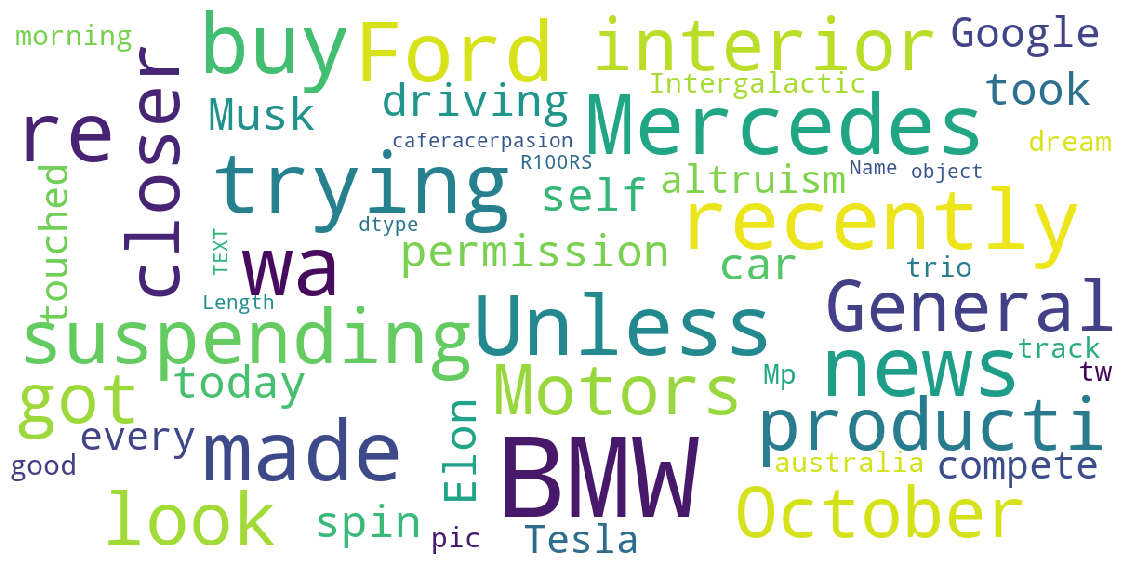

In [10]:
def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(train["TEXT"].dropna())

# 4)- Clean data

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z +_]')
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['rt', 'http']) # extend stopwords; rt means re-tweet
STOPWORDS = set(STOPWORDS)

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwords from text
    text = text.strip()
    return text

In [13]:
train['cleaned']=[text_prepare(x) for x in train['TEXT']]

In [14]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

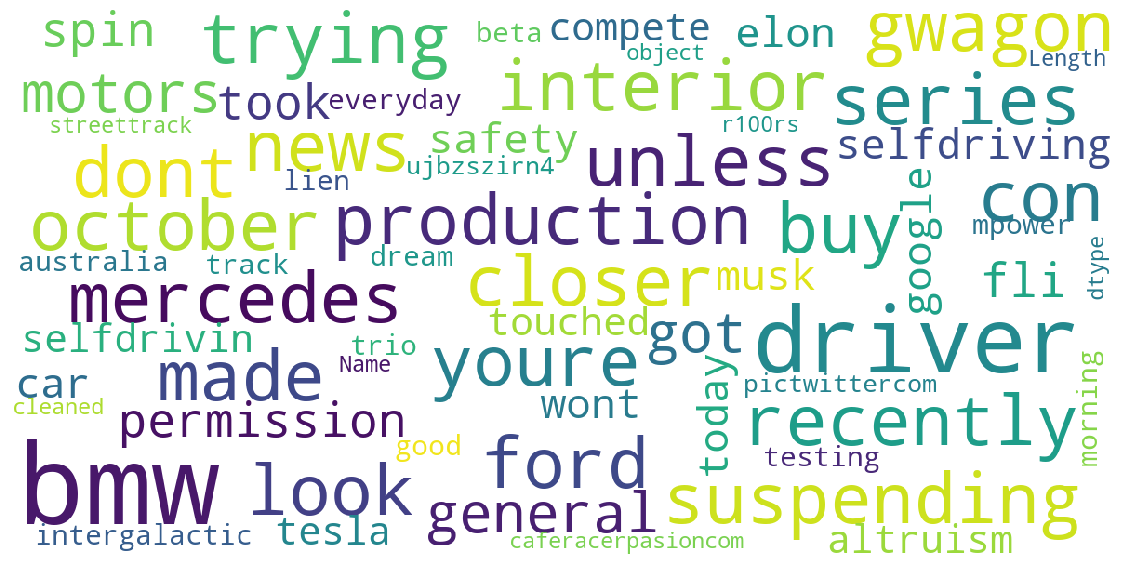

In [15]:
def Cleanwordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Cleanwordcloud(train["cleaned"].dropna())

# 5)-Sentiments extraction

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sid= SentimentIntensityAnalyzer()

In [18]:
train['Sent_compound_Polarity'] = train.TEXT.apply(lambda x:sid.polarity_scores(x)['compound'])
train['neutral']= train.TEXT.apply(lambda x:sid.polarity_scores(x)['neu'])
train['negative']= train.TEXT.apply (lambda x:sid.polarity_scores(x)['neg'])
train['positive']= train.TEXT.apply(lambda x:sid.polarity_scores(x)['pos'])
train['Sent_type']=''

In [19]:
train.head()

,TEXT,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type
443783,Unless you’re trying to buy me a Mercedes G-wa...,unless youre trying buy mercedes gwagon dont t...,0.0000,1.000,0.000,0.000,
229375,Ford recently made news by suspending producti...,ford recently made news suspending production ...,-0.2500,0.931,0.069,0.000,
20760,Just to get a closer look at the interior of o...,get closer look interior 2009 bmw 3 series con...,0.0000,1.000,0.000,0.000,
337983,"In October 2014, General Motors got permission...",october 2014 general motors got permission fli...,-0.3818,0.860,0.140,0.000,
247040,I took a spin in a self-driving car today. My ...,took spin selfdriving car today safety driver ...,0.6705,0.825,0.000,0.175,


In [20]:
train.loc[train.Sent_compound_Polarity > 0, 'Sent_type']= 'Positive'

train.loc[train.Sent_compound_Polarity == 0, 'Sent_type']= 'Neutral'

train.loc[train.Sent_compound_Polarity < 0, 'Sent_type']= 'Negative'

In [21]:
train.head()

,TEXT,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type
443783,Unless you’re trying to buy me a Mercedes G-wa...,unless youre trying buy mercedes gwagon dont t...,0.0000,1.000,0.000,0.000,Neutral
229375,Ford recently made news by suspending producti...,ford recently made news suspending production ...,-0.2500,0.931,0.069,0.000,Negative
20760,Just to get a closer look at the interior of o...,get closer look interior 2009 bmw 3 series con...,0.0000,1.000,0.000,0.000,Neutral
337983,"In October 2014, General Motors got permission...",october 2014 general motors got permission fli...,-0.3818,0.860,0.140,0.000,Negative
247040,I took a spin in a self-driving car today. My ...,took spin selfdriving car today safety driver ...,0.6705,0.825,0.000,0.175,Positive


In [22]:
train.Sent_type.value_counts()

Neutral     6468
Positive    6089
Negative    2443
Name: Sent_type, dtype: int64

#### mapping in numeric form

In [23]:
train['sentiment'] = train.Sent_type.map({'Negative':0, 'Positive':1, 'Neutral':2})

In [24]:
train.head()

,TEXT,cleaned,Sent_compound_Polarity,neutral,negative,positive,Sent_type,sentiment
443783,Unless you’re trying to buy me a Mercedes G-wa...,unless youre trying buy mercedes gwagon dont t...,0.0000,1.000,0.000,0.000,Neutral,2
229375,Ford recently made news by suspending producti...,ford recently made news suspending production ...,-0.2500,0.931,0.069,0.000,Negative,0
20760,Just to get a closer look at the interior of o...,get closer look interior 2009 bmw 3 series con...,0.0000,1.000,0.000,0.000,Neutral,2
337983,"In October 2014, General Motors got permission...",october 2014 general motors got permission fli...,-0.3818,0.860,0.140,0.000,Negative,0
247040,I took a spin in a self-driving car today. My ...,took spin selfdriving car today safety driver ...,0.6705,0.825,0.000,0.175,Positive,1


In [25]:
train.sentiment.value_counts()

2    6468
1    6089
0    2443
Name: sentiment, dtype: int64

In [26]:
train_df=train.drop(['cleaned','Sent_compound_Polarity','neutral','negative','positive'], axis=1)
train_df.head(2)

,TEXT,Sent_type,sentiment
443783,Unless you’re trying to buy me a Mercedes G-wa...,Neutral,2
229375,Ford recently made news by suspending producti...,Negative,0


In [27]:
train_df.to_pickle('model.pkl')
train_df.to_csv('model.csv')

# END OF NOTEBOOK